# MACHNE LEARNING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer 
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV     


In [2]:
train_data = pd.read_csv("C:/Users/thaba/OneDrive/Documentos/Hex Software/tested.csv")
test_data = pd.read_csv("C:/Users/thaba/OneDrive/Documentos/Hex Software/tested.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [9]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
# describing only categorical data

train_data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [13]:
train_data.groupby(['Pclass'], as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.467290
1,2,0.322581
2,3,0.330275


In [15]:
train_data.groupby(['Sex'], as_index=False)['Survived'].mean()

,Sex,Survived
0,female,1.0
1,male,0.0


In [17]:
train_data.groupby(['SibSp'], as_index=False)['Survived'].mean()

,SibSp,Survived
0,0,0.310954
1,1,0.490909
2,2,0.428571
3,3,0.250000
4,4,0.250000
5,5,1.000000
6,8,0.500000


In [19]:
train_data.groupby(['Parch'], as_index=False)['Survived'].mean()

,Parch,Survived
0,0,0.305556
1,1,0.538462
2,2,0.606061
3,3,0.666667
4,4,1.000000
5,5,0.000000
6,6,0.000000
7,9,0.500000


In [21]:
# family size on the titanic

train_data['Family_Size']= train_data['SibSp'] + train_data['Parch'] +1
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


In [23]:
test_data['Family_Size']= train_data['SibSp'] + train_data['Parch'] +1

In [25]:
train_data.groupby(['Family_Size'], as_index=False)['Survived'].mean()

,Family_Size,Survived
0,1,0.268775
1,2,0.486486
2,3,0.526316
3,4,0.714286
4,5,0.285714
5,6,0.666667
6,7,0.250000
7,8,0.500000
8,11,0.500000


In [27]:
train_data.groupby(['Embarked'], as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.392157
1,Q,0.521739
2,S,0.325926


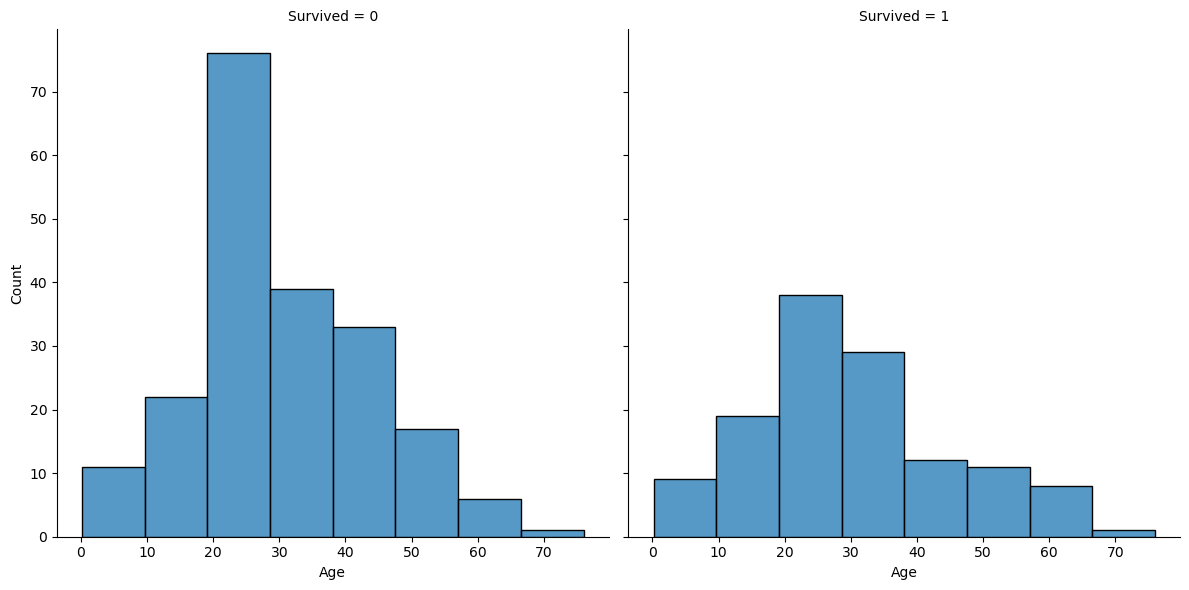

In [29]:
sns.displot(train_data, x='Age', col='Survived', binwidth=10, height=6)
plt.show()

In [30]:
#cutting the age

train_data['Age_cut'] = pd.qcut(train_data['Age'], 10)
test_data['Age_cut'] = pd.qcut(test_data['Age'], 10)

In [33]:
train_data.groupby(['Age_cut'], as_index=False)['Survived'].mean()

C:\Users\thaba\AppData\Local\Temp\ipykernel_21356\3942492841.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data.groupby(['Age_cut'], as_index=False)['Survived'].mean()


,Age_cut,Survived
0,"(0.169, 16.1]",0.441176
1,"(16.1, 20.0]",0.485714
2,"(20.0, 22.0]",0.393939
3,"(22.0, 25.0]",0.275000
4,"(25.0, 27.0]",0.320000
5,"(27.0, 30.0]",0.393939
6,"(30.0, 36.0]",0.388889
7,"(36.0, 42.0]",0.200000
8,"(42.0, 50.0]",0.428571
9,"(50.0, 76.0]",0.483871


In [35]:
train_data.loc[train_data['Age'] <= 16.1, 'Age'] = 0
train_data.loc[(train_data['Age'] > 16.1) & (train_data['Age'] <= 20), 'Age'] = 1
train_data.loc[(train_data['Age'] > 20) & (train_data['Age'] <= 22), 'Age']  = 2
train_data.loc[(train_data['Age'] > 22) & (train_data['Age'] <= 25), 'Age']  = 3
train_data.loc[(train_data['Age'] > 25) & (train_data['Age'] <= 27), 'Age']  = 4
train_data.loc[(train_data['Age'] > 27) & (train_data['Age'] <= 30), 'Age']  = 5
train_data.loc[(train_data['Age'] > 30) & (train_data['Age'] <= 36), 'Age']  = 6
train_data.loc[(train_data['Age'] > 36) & (train_data['Age'] <= 42), 'Age']  = 7
train_data.loc[(train_data['Age'] > 42) & (train_data['Age'] <= 50), 'Age']  = 8
train_data.loc[(train_data['Age'] > 50) & (train_data['Age'] <= 76), 'Age']  = 9
train_data.loc[train_data['Age']> 76, 'Age'] 

Series([], Name: Age, dtype: float64)

In [37]:
test_data.loc[test_data['Age'] <= 16.1, 'Age'] = 0
test_data.loc[(test_data['Age'] > 16.1) & (test_data['Age'] <= 20), 'Age'] = 1
test_data.loc[(test_data['Age'] > 20) & (test_data['Age'] <= 22), 'Age'] = 2
test_data.loc[(test_data['Age'] > 22) & (test_data['Age'] <= 25), 'Age']  = 3
test_data.loc[(test_data['Age'] > 25) & (test_data['Age'] <= 27), 'Age']  = 4
test_data.loc[(test_data['Age'] > 27) & (test_data['Age'] <= 30), 'Age']  = 5
test_data.loc[(test_data['Age'] > 30) & (test_data['Age'] <= 36), 'Age']  = 6
test_data.loc[(test_data['Age'] > 36) & (test_data['Age'] <= 42), 'Age']  = 7
test_data.loc[(test_data['Age'] > 42) & (test_data['Age'] <= 50), 'Age']  = 8
test_data.loc[(test_data['Age'] > 50) & (test_data['Age'] <= 76), 'Age']  = 9
test_data.loc[test_data['Age']> 76, 'Age'] 

Series([], Name: Age, dtype: float64)

In [39]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Age_cut
0,892,0,3,"Kelly, Mr. James",male,6.0,0,0,330911,7.8292,NaN,Q,1,"(30.0, 36.0]"
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,8.0,1,0,363272,7.0000,NaN,S,2,"(42.0, 50.0]"
2,894,0,2,"Myles, Mr. Thomas Francis",male,9.0,0,0,240276,9.6875,NaN,Q,1,"(50.0, 76.0]"
3,895,0,3,"Wirz, Mr. Albert",male,4.0,0,0,315154,8.6625,NaN,S,1,"(25.0, 27.0]"
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2.0,1,1,3101298,12.2875,NaN,S,3,"(20.0, 22.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,NaN
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,7.0,0,0,PC 17758,108.9000,C105,C,1,"(36.0, 42.0]"
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,7.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,"(36.0, 42.0]"
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,NaN


In [41]:
test_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Age_cut
0,892,0,3,"Kelly, Mr. James",male,6.0,0,0,330911,7.8292,NaN,Q,1,"(30.0, 36.0]"
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,8.0,1,0,363272,7.0000,NaN,S,2,"(42.0, 50.0]"
2,894,0,2,"Myles, Mr. Thomas Francis",male,9.0,0,0,240276,9.6875,NaN,Q,1,"(50.0, 76.0]"
3,895,0,3,"Wirz, Mr. Albert",male,4.0,0,0,315154,8.6625,NaN,S,1,"(25.0, 27.0]"
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2.0,1,1,3101298,12.2875,NaN,S,3,"(20.0, 22.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,NaN
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,7.0,0,0,PC 17758,108.9000,C105,C,1,"(36.0, 42.0]"
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,7.0,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,"(36.0, 42.0]"
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,NaN


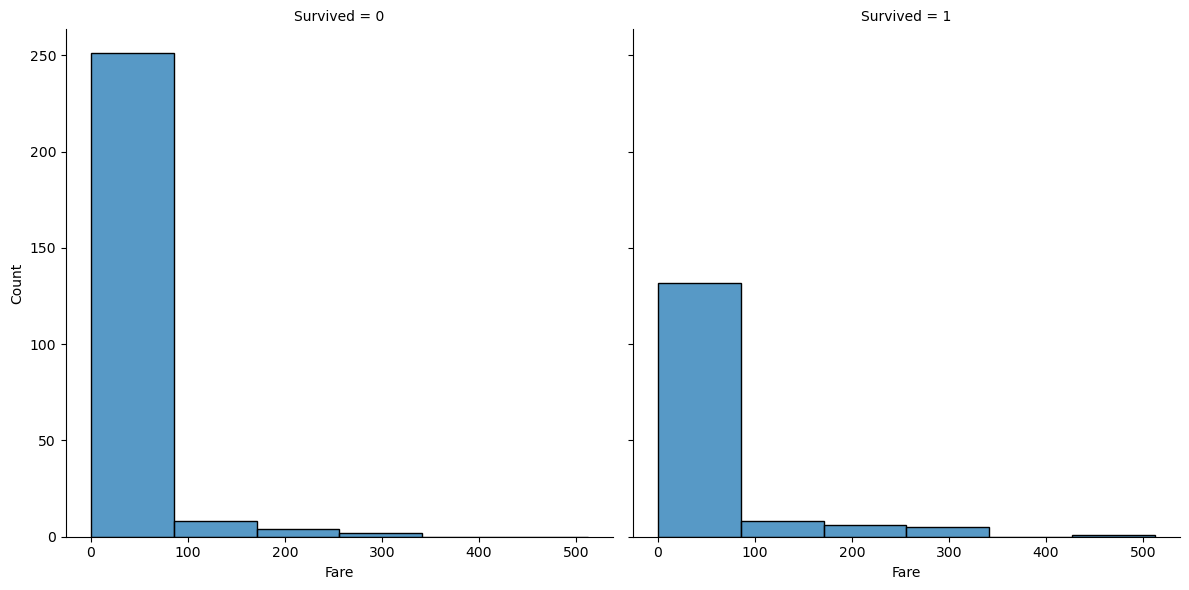

In [43]:
sns.displot(train_data, x='Fare', col='Survived', binwidth=80, height=6)
plt.show()

In [44]:
train_data['Fare_cut'] = pd.qcut(train_data['Fare'], 8)
test_data['Fare_cut'] = pd.qcut(test_data['Fare'], 8)

In [47]:
train_data.groupby(['Fare_cut'], as_index=False)['Survived'].mean()

C:\Users\thaba\AppData\Local\Temp\ipykernel_21356\1897647754.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data.groupby(['Fare_cut'], as_index=False)['Survived'].mean()


,Fare_cut,Survived
0,"(-0.001, 7.75]",0.300000
1,"(7.75, 7.896]",0.204545
2,"(7.896, 10.5]",0.250000
3,"(10.5, 14.454]",0.295455
4,"(14.454, 23.25]",0.470588
5,"(23.25, 31.5]",0.314815
6,"(31.5, 69.55]",0.549020
7,"(69.55, 512.329]",0.529412


In [49]:
train_data.loc[train_data['Fare'] <= 7.75, 'Fare'] = 0
train_data.loc[(train_data['Fare'] > 7.75) & (train_data['Fare'] <= 7.896), 'Fare'] = 1
train_data.loc[(train_data['Fare'] > 7.896) & (train_data['Fare'] <= 10.5), 'Fare'] = 2
train_data.loc[(train_data['Fare'] > 10.55) & (train_data['Fare'] <= 11.025), 'Fare']  = 3
train_data.loc[(train_data['Fare'] > 11.025) & (train_data['Fare'] <= 14.454), 'Fare']  = 4
train_data.loc[(train_data['Fare'] > 14.454) & (train_data['Fare'] <= 23.25), 'Fare']  = 5
train_data.loc[(train_data['Fare'] > 23.25) & (train_data['Fare'] <= 31.5), 'Fare']  = 6
train_data.loc[(train_data['Fare'] > 31.5) & (train_data['Fare'] <= 69.55), 'Fare']  = 7
train_data.loc[(train_data['Fare'] > 69.55) & (train_data['Fare'] <= 512.329), 'Fare']  = 8
train_data.loc[train_data['Fare']> 512.329, 'Fare'] 

343    512.3292
Name: Fare, dtype: float64

In [51]:
test_data.loc[test_data['Fare'] <= 7.75, 'Fare'] = 0
test_data.loc[(test_data['Fare'] > 7.75) & (test_data['Fare'] <= 7.896), 'Fare'] = 1
test_data.loc[(test_data['Fare'] > 7.896) & (test_data['Fare'] <= 10.5), 'Fare'] = 2
test_data.loc[(test_data['Fare'] > 10.55) & (test_data['Fare'] <= 11.025), 'Fare']  = 3
test_data.loc[(test_data['Fare'] > 11.025) & (test_data['Fare'] <= 14.454), 'Fare']  = 4
test_data.loc[(test_data['Fare'] > 14.454) & (test_data['Fare'] <= 23.25), 'Fare']  = 5
test_data.loc[(test_data['Fare'] > 23.25) & (test_data['Fare'] <= 31.5), 'Fare']  = 6
test_data.loc[(test_data['Fare'] > 31.5) & (test_data['Fare'] <= 69.55), 'Fare']  = 7
test_data.loc[(test_data['Fare'] > 69.55) & (test_data['Fare'] <= 512.329), 'Fare']  = 8
test_data.loc[test_data['Fare']> 512.329, 'Fare'] 

343    512.3292
Name: Fare, dtype: float64

In [53]:
train_data['Name']

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

In [55]:
train_data['Name'].str.split(pat= ",", expand = True)

,0,1
0,Kelly,Mr. James
1,Wilkes,Mrs. James (Ellen Needs)
2,Myles,Mr. Thomas Francis
3,Wirz,Mr. Albert
4,Hirvonen,Mrs. Alexander (Helga E Lindqvist)
...,...,...
413,Spector,Mr. Woolf
414,Oliva y Ocana,Dona. Fermina
415,Saether,Mr. Simon Sivertsen
416,Ware,Mr. Frederick


In [57]:
train_data['Name'].str.split(pat= ",", expand = True)[1].str.split(pat= ".", expand = True)[0]

0           Mr
1          Mrs
2           Mr
3           Mr
4          Mrs
        ...   
413         Mr
414       Dona
415         Mr
416         Mr
417     Master
Name: 0, Length: 418, dtype: object

In [59]:
train_data['Title'] = train_data['Name'].str.split(pat= ",", expand = True)[1].str.split(pat= ".", expand = True)[0].apply(lambda x:x.strip())
test_data['Title'] = test_data['Name'].str.split(pat= ",", expand = True)[1].str.split(pat= ".", expand = True)[0].apply(lambda x:x.strip())


In [61]:
train_data.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Col,0.0
1,Dona,1.0
2,Dr,0.0
3,Master,0.0
4,Miss,1.0
5,Mr,0.0
6,Mrs,1.0
7,Ms,1.0
8,Rev,0.0


In [63]:
#military - Capt, Col, Major
#noble - Jonkheer, the Countess, Dona, Lady, Sir, Master
#unmaried Female - Mlle, Ms, Mme

train_data['Title'] = train_data['Title'].replace({
    'Col': 'Military',
    'Dona': 'Noble',
    'Rev': 'Noble',
    'Sir': 'Noble',
    'Master': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})

test_data['Title'] = test_data['Title'].replace({
    'Col': 'Military',
    'Dona': 'Noble',
    'Rev': 'Noble',
    'Sir': 'Noble',
    'Master': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})


In [65]:
train_data.groupby(['Title'], as_index=False)['Survived'].agg(['count', 'mean'])

,Title,count,mean
0,Dr,1,0.00
1,Military,2,0.00
2,Miss,78,1.00
3,Mr,240,0.00
4,Mrs,72,1.00
5,Noble,25,0.08


In [67]:
train_data['Name_length'] = train_data['Name'].apply(lambda x:len(x))
test_data['Name_length'] = test_data['Name'].apply(lambda x:len(x))


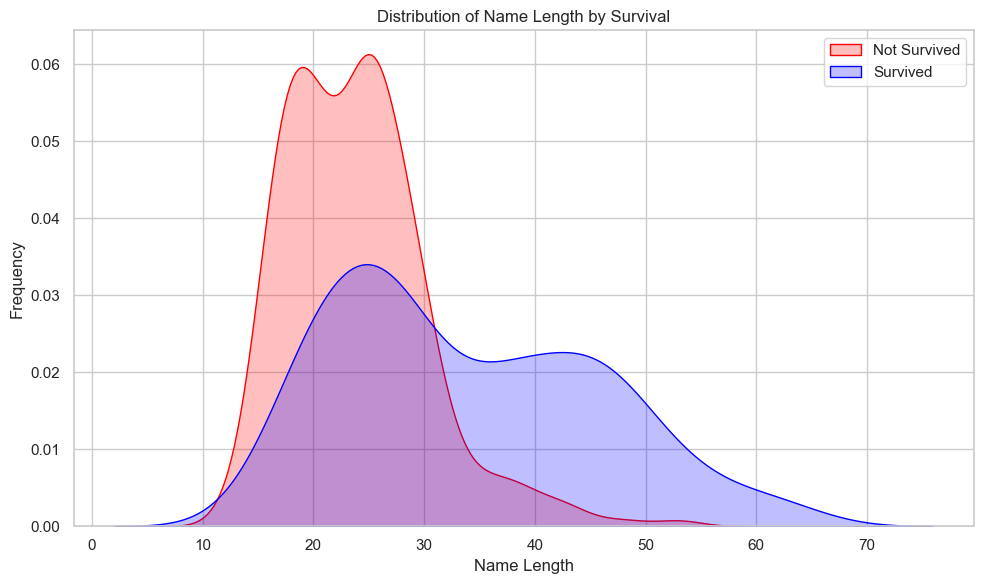

In [69]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

for label, color in zip([0, 1], ['red', 'blue']):
    subset = train_data[(train_data['Survived'] == label) & (train_data['Name_length'].notnull())]
    sns.kdeplot(
        data=subset,
        x='Name_length',
        fill=True,
        common_norm=False,
        label='Survived' if label == 1 else 'Not Survived',
        color=color
    )
# Labels and legend
plt.xlabel('Name Length')
plt.ylabel('Frequency')
plt.title('Distribution of Name Length by Survival')
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
train_data['Name_length_groupby'] = pd.qcut(train_data['Name_length'], 4)
test_data['Name_length_groupby'] = pd.qcut(test_data['Name_length'], 4)

In [73]:
train_data.groupby(['Name_length_groupby'], as_index=False)['Survived'].mean()

C:\Users\thaba\AppData\Local\Temp\ipykernel_21356\1366776180.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data.groupby(['Name_length_groupby'], as_index=False)['Survived'].mean()


,Name_length_groupby,Survived
0,"(12.999, 20.0]",0.165217
1,"(20.0, 25.0]",0.252427
2,"(25.0, 30.75]",0.326316
3,"(30.75, 63.0]",0.723810


In [75]:
train_data.loc[train_data['Name_length'] <= 20, 'Name_Size'] = 0
train_data.loc[(train_data['Name_length'] > 20) & (train_data['Name_length'] <= 25), 'Name_Size'] = 1
train_data.loc[(train_data['Name_length'] > 25) & (train_data['Name_length'] <= 30.75), 'Name_Size'] = 2
train_data.loc[(train_data['Name_length'] > 30.75) & (train_data['Name_length'] <= 63), 'Name_Size']  = 3
train_data.loc[train_data['Name_length']> 63, 'Name_Size'] 

Series([], Name: Name_Size, dtype: float64)

In [77]:
test_data.loc[test_data['Name_length'] <= 20, 'Name_Size'] = 0
test_data.loc[(test_data['Name_length'] > 20) & (test_data['Name_length'] <= 25), 'Name_Size'] = 1
test_data.loc[(test_data['Name_length'] > 25) & (test_data['Name_length'] <= 30.75), 'Name_Size'] = 2
test_data.loc[(test_data['Name_length'] > 30.75) & (test_data['Name_length'] <= 63), 'Name_Size']  = 3
test_data.loc[test_data['Name_length']> 63, 'Name_Size'] 

Series([], Name: Name_Size, dtype: float64)

In [79]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Age_cut,Fare_cut,Title,Name_length,Name_length_groupby,Name_Size
0,892,0,3,"Kelly, Mr. James",male,6.0,0,0,330911,1.0,NaN,Q,1,"(30.0, 36.0]","(7.75, 7.896]",Mr,16,"(12.999, 20.0]",0.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,8.0,1,0,363272,0.0,NaN,S,2,"(42.0, 50.0]","(-0.001, 7.75]",Mrs,32,"(30.75, 63.0]",3.0
2,894,0,2,"Myles, Mr. Thomas Francis",male,9.0,0,0,240276,2.0,NaN,Q,1,"(50.0, 76.0]","(7.896, 10.5]",Mr,25,"(20.0, 25.0]",1.0
3,895,0,3,"Wirz, Mr. Albert",male,4.0,0,0,315154,2.0,NaN,S,1,"(25.0, 27.0]","(7.896, 10.5]",Mr,16,"(12.999, 20.0]",0.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2.0,1,1,3101298,4.0,NaN,S,3,"(20.0, 22.0]","(10.5, 14.454]",Mrs,44,"(30.75, 63.0]",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,2.0,NaN,S,1,NaN,"(7.896, 10.5]",Mr,18,"(12.999, 20.0]",0.0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,7.0,0,0,PC 17758,8.0,C105,C,1,"(36.0, 42.0]","(69.55, 512.329]",Noble,28,"(25.0, 30.75]",2.0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,7.0,0,0,SOTON/O.Q. 3101262,0.0,NaN,S,1,"(36.0, 42.0]","(-0.001, 7.75]",Mr,28,"(25.0, 30.75]",2.0
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,2.0,NaN,S,1,NaN,"(7.896, 10.5]",Mr,19,"(12.999, 20.0]",0.0


In [81]:
train_data['Ticket']

0                  330911
1                  363272
2                  240276
3                  315154
4                 3101298
              ...        
413             A.5. 3236
414              PC 17758
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 418, dtype: object

In [83]:
train_data['Ticket_Number'] = train_data['Ticket'].str.split().str[-1]
test_data['Ticket_Number'] = test_data['Ticket'].str.split().str[-1]

In [85]:
train_data.groupby(['Ticket_Number'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values(
    'count', ascending=False)

,Ticket_Number,count,mean
73,17608,5,0.6
111,2343,4,0.5
13,113503,4,0.5
207,31029,3,0.0
262,347077,3,0.0
...,...,...,...
133,248659,1,0.0
132,244368,1,0.0
131,244360,1,0.0
130,244358,1,0.0


In [87]:
train_data.groupby('Ticket_Number')['Ticket_Number'].transform('count')

0      1
1      1
2      1
3      1
4      1
      ..
413    1
414    1
415    1
416    1
417    1
Name: Ticket_Number, Length: 418, dtype: int64

In [89]:
train_data['Ticket_Number_Counts'] = train_data.groupby('Ticket_Number')['Ticket_Number'].transform('count')
test_data['Ticket_Number_Counts'] = test_data.groupby('Ticket_Number')['Ticket_Number'].transform('count')

In [91]:
summary = (
    train_data
    .groupby('Ticket_Number_Counts', as_index=False)['Survived']
    .agg(count='count', survival_rate='mean')
    .sort_values('count', ascending=False)
)

print(summary.head())

   Ticket_Number_Counts  count  survival_rate
0                     1    319       0.332288
1                     2     68       0.485294
2                     3     18       0.333333
3                     4      8       0.500000
4                     5      5       0.600000


In [93]:
train_data['Ticket'].str.split(pat=" ", expand = True)

,0,1,2
0,330911,None,None
1,363272,None,None
2,240276,None,None
3,315154,None,None
4,3101298,None,None
...,...,...,...
413,A.5.,3236,None
414,PC,17758,None
415,SOTON/O.Q.,3101262,None
416,359309,None,None


In [95]:
import re

# Define a function to extract the prefix
def extract_ticket_location(ticket):
    match = re.match(r'([A-Za-z/]+)', ticket)  # Match the first word or letters before space
    return match.group(0) if match else 'Blank'  # Return the matched prefix or 'Blank'

# Apply the function to the 'Ticket' column
train_data['Ticket_Location'] = train_data['Ticket'].apply(extract_ticket_location)
test_data['Ticket_Location'] = test_data['Ticket'].apply(extract_ticket_location)


In [97]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Family_Size,Age_cut,Fare_cut,Title,Name_length,Name_length_groupby,Name_Size,Ticket_Number,Ticket_Number_Counts,Ticket_Location
0,892,0,3,"Kelly, Mr. James",male,6.0,0,0,330911,1.0,...,1,"(30.0, 36.0]","(7.75, 7.896]",Mr,16,"(12.999, 20.0]",0.0,330911,1,Blank
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,8.0,1,0,363272,0.0,...,2,"(42.0, 50.0]","(-0.001, 7.75]",Mrs,32,"(30.75, 63.0]",3.0,363272,1,Blank
2,894,0,2,"Myles, Mr. Thomas Francis",male,9.0,0,0,240276,2.0,...,1,"(50.0, 76.0]","(7.896, 10.5]",Mr,25,"(20.0, 25.0]",1.0,240276,1,Blank
3,895,0,3,"Wirz, Mr. Albert",male,4.0,0,0,315154,2.0,...,1,"(25.0, 27.0]","(7.896, 10.5]",Mr,16,"(12.999, 20.0]",0.0,315154,1,Blank
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,2.0,1,1,3101298,4.0,...,3,"(20.0, 22.0]","(10.5, 14.454]",Mrs,44,"(30.75, 63.0]",3.0,3101298,1,Blank
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,2.0,...,1,NaN,"(7.896, 10.5]",Mr,18,"(12.999, 20.0]",0.0,3236,1,A
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,7.0,0,0,PC 17758,8.0,...,1,"(36.0, 42.0]","(69.55, 512.329]",Noble,28,"(25.0, 30.75]",2.0,17758,1,PC
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,7.0,0,0,SOTON/O.Q. 3101262,0.0,...,1,"(36.0, 42.0]","(-0.001, 7.75]",Mr,28,"(25.0, 30.75]",2.0,3101262,1,SOTON/O
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,2.0,...,1,NaN,"(7.896, 10.5]",Mr,19,"(12.999, 20.0]",0.0,359309,1,Blank


In [99]:
train_data['Ticket_Location'].value_counts()

Ticket_Location
Blank       296
PC           32
C            22
SOTON/O       9
CA            8
A/            8
S             7
F             6
SC/PARIS      6
W             6
STON/O        3
A             3
SC/AH         2
SC/A          2
AQ/           2
PP            1
STON/OQ       1
SOTON/OQ      1
SC            1
SC/Paris      1
LP            1
Name: count, dtype: int64

In [101]:
train_data['Ticket_Location'] = train_data['Ticket_Location'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})

test_data['Ticket_Location'] = test_data['Ticket_Location'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})

In [103]:
train_data.groupby(['Ticket_Location'], as_index=False)['Survived'].agg(['count', 'mean'])

,Ticket_Location,count,mean
0,A,3,0.333333
1,A/,8,0.125000
2,AQ/,2,0.500000
3,Blank,296,0.347973
4,C,22,0.318182
5,CA,8,0.500000
6,F,6,0.666667
7,LP,1,0.000000
8,PC,32,0.531250
9,PP,1,1.000000


In [105]:
#filling null values with u
train_data['Cabin'] = train_data['Cabin'].fillna('U')
test_data['Cabin'] = test_data['Cabin'].fillna('U')

# Extracting the first character of the 'Cabin' column or assign 'x' if it's a missing value
train_data['Cabin'] = train_data['Cabin'].apply(lambda x: x[0] if x != 'U' else 'x')
test_data['Cabin'] = test_data['Cabin'].apply(lambda x: x[0] if x != 'U' else 'x')

In [107]:
train_data.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,7,0.428571
1,B,18,0.500000
2,C,35,0.542857
3,D,13,0.384615
4,E,9,0.444444
5,F,8,0.375000
6,G,1,1.000000
7,x,327,0.330275


In [109]:
train_data['Cabin_Assigned'] = train_data['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_data['Cabin_Assigned'] = test_data['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [111]:
train_data.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin_Assigned,count,mean
0,1,418,0.363636


In [113]:
train_data.shape

(418, 23)

In [115]:
test_data.shape

(418, 23)

In [117]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   PassengerId           418 non-null    int64   
 1   Survived              418 non-null    int64   
 2   Pclass                418 non-null    int64   
 3   Name                  418 non-null    object  
 4   Sex                   418 non-null    object  
 5   Age                   332 non-null    float64 
 6   SibSp                 418 non-null    int64   
 7   Parch                 418 non-null    int64   
 8   Ticket                418 non-null    object  
 9   Fare                  417 non-null    float64 
 10  Cabin                 418 non-null    object  
 11  Embarked              418 non-null    object  
 12  Family_Size           418 non-null    int64   
 13  Age_cut               332 non-null    category
 14  Fare_cut              417 non-null    category
 15  Title 

In [119]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].mean())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [121]:
#setting up processing steps for categorical data

ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')

In [123]:
ode_cols = ['Family_Size_Grouped']
ohe_cols = ['Sex', 'Embarked']


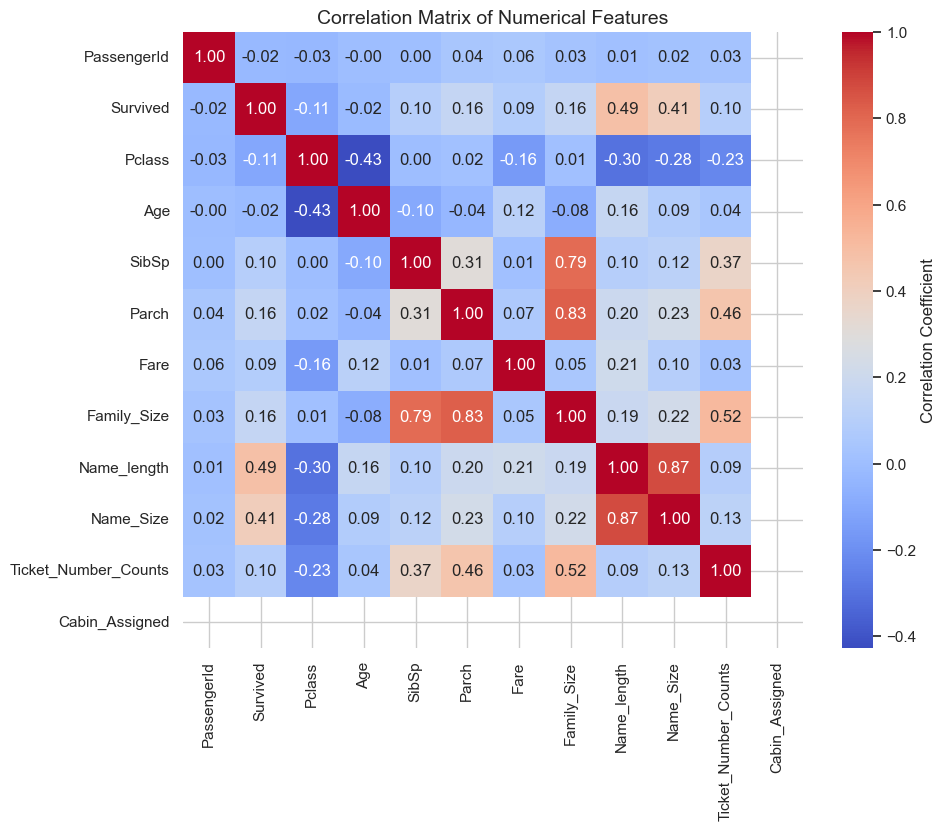

In [125]:
correlation_matrix = train_data.select_dtypes(include=['float64', 'int64']).corr()

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax, cbar_kws={'label': 'Correlation Coefficient'})


plt.title('Correlation Matrix of Numerical Features', fontsize=14)


plt.show()

In [126]:
#droping columns form the train and test dataset

X = train_data.drop(['Survived', 'SibSp', 'Parch'], axis=1)
y = train_data['Survived']

X_test = test_data.drop(['Age_cut', 'Fare_cut', 'SibSp', 'Parch'], axis=1)

In [129]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify = y, random_state=21)

# PIPELINES

In [132]:
# setting up an ordinal pipeline

ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')), 
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))  # Ordinal encoding
])

In [134]:
#onehot pipeline

ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')), 
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  
])

In [140]:
#column transfer to process data with different pipelines
from sklearn.compose import ColumnTransformer

col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']), 
    ('ord_pipeline', ordinal_pipeline, ode_cols),  #applying ordinal pipeline to ordinal colums
    ('ohe_pipeline', ohe_pipeline, ohe_cols),    #applying one-hot pipeline to one-hot columns 
    ('passthrough', 'passthrough', ['Pclass', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare', 'TicketNumberCounts'])  
], remainder='drop',  # Drop columns not specified in the transformers
n_jobs=-1) 

In [150]:
from sklearn.preprocessing import StandardScaler

# Define the categorical and numerical features
categorical_features = ['Sex', 'Embarked', 'Pclass']
numerical_features = ['Age', 'Fare']

# Preprocessing for numerical data 
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())  
])

# Preprocessing for categorical data 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])

# Combine both preprocessing steps into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


from sklearn.ensemble import RandomForestClassifier
pipefinalrfc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


pipefinalrfc.fit(X_train, y_train)  


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked',
                                                   'Pclass'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [144]:

from sklearn.metrics import accuracy_score  # Import accuracy_score here



X = train_data.drop(columns=['Survived'])  
y = train_data['Survived']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the preprocessing for numerical and categorical columns
numerical_features = ['Age', 'Fare']
categorical_features = ['Sex', 'Embarked', 'Pclass']

# Preprocessing for numerical data (impute missing values with mean and standardise)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler()) 
])

# Preprocessing for categorical data (impute missing values and apply one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# A pipeline with preprocessing and the model 
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)  
print(f'Accuracy: {accuracy:.2f}')


NameError: name 'StandardScaler' is not defined

In [146]:
pipefinalrfc = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), ['Age', 'Fare']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked', 'Pclass'])
    ])),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipefinalrfc.fit(X_train, y_train) 


pipefinaldtc = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), ['Age', 'Fare']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked', 'Pclass'])
    ])),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipefinalknn = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), ['Age', 'Fare']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked', 'Pclass'])
    ])),
    ('classifier', KNeighborsClassifier())
])

# Train each model
pipefinaldtc.fit(X_train, y_train)
pipefinalknn.fit(X_train, y_train)

NameError: name 'StandardScaler' is not defined

In [150]:
pipefinalsvc = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), ['Age', 'Fare']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked', 'Pclass'])
    ])),
    ('classifier', SVC(random_state=42))
])

# Train the model
pipefinalsvc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked',
                                                   'Pclass'])])),
                ('classifier', SVC(random_state=42))])

In [152]:
pipefinallr = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), ['Age', 'Fare']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Sex', 'Embarked', 'Pclass'])
    ])),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the Logistic Regression model
pipefinallr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked',
                                                   'Pclass'])])),
                ('classifier', LogisticRegression(random_state=42))])

In [154]:
pipelines = {
    'RandomForest': pipefinalrfc,
    'DecisionTree': pipefinaldtc,
    'KNN': pipefinalknn,
    'SVC': pipefinalsvc,
    'LogisticRegression': pipefinallr,
}

# predictions
predictions = {}
for name, pipeline in pipelines.items():
    predictions[name] = pipeline.predict(X_test)

from sklearn.metrics import accuracy_score

results = {}
for name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print the accuracy for each model
for model, acc in results.items():
    print(f'{model} Accuracy: {acc:.2f}')

RandomForest Accuracy: 1.00
DecisionTree Accuracy: 1.00
KNN Accuracy: 1.00
SVC Accuracy: 1.00
LogisticRegression Accuracy: 1.00
